In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Load the cleaned dataset
data = pd.read_csv("cleaned_data_neural_networks.csv")

# Separate features and target
X = data.drop(columns=['y'])  # 'y' is assumed to be the target column
y = data['y']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300, random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)

# Print Accuracy Scores
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

# Assess dataset readiness
if rf_accuracy > 0.75 and nn_accuracy > 0.75:
    print("The dataset is likely ready for prediction.")
else:
    print("Further preprocessing or feature engineering may be required.")

Random Forest Accuracy: 0.9192
Neural Network Accuracy: 0.8253
The dataset is likely ready for prediction.


In [6]:
# Load the dataset
data = pd.read_csv("cleaned_data_neural_networks.csv")
data['y'].value_counts()

y
0    30659
1    30659
Name: count, dtype: int64

In [2]:
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('resampled_and_original_data.csv')

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the 'campaign' column
data['campaign_scaled'] = scaler.fit_transform(data[['campaign']])

# Display the scaled column statistics
data['campaign_scaled'].describe()

count    61318.000000
mean         0.074217
std          0.123658
min          0.000000
25%          0.000000
50%          0.000000
75%          0.125000
max          1.000000
Name: campaign_scaled, dtype: float64

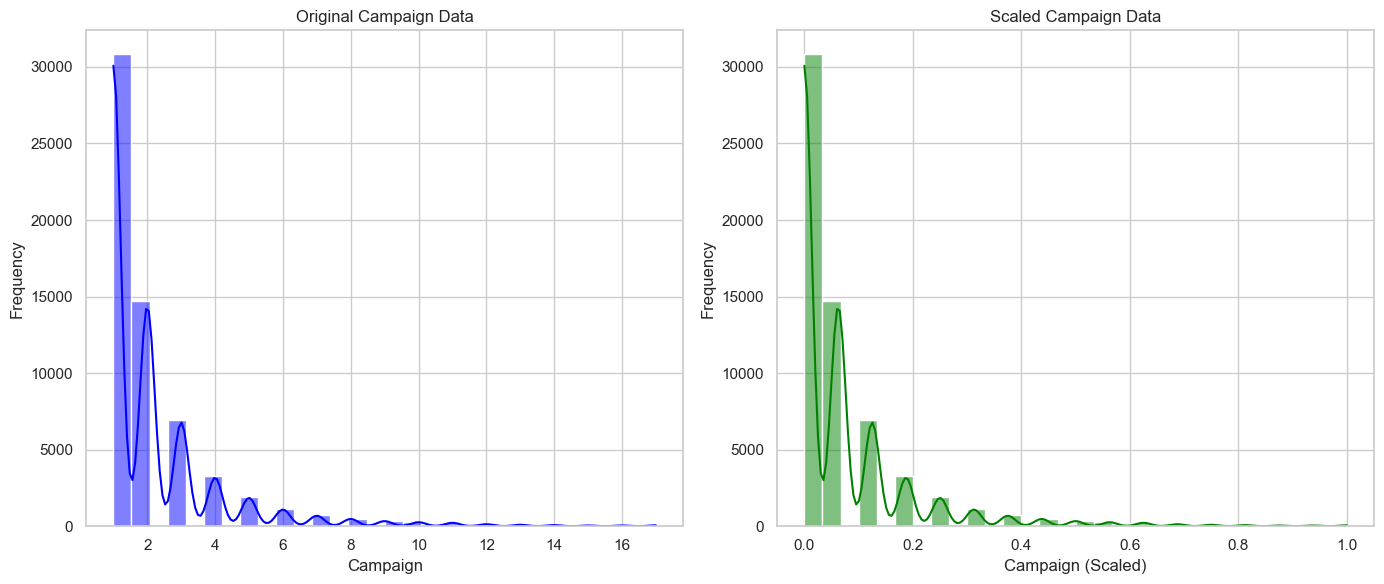

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")

# Create subplots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot original data
sns.histplot(data['campaign'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Original Campaign Data')
axes[0].set_xlabel('Campaign')
axes[0].set_ylabel('Frequency')

# Plot scaled data
sns.histplot(data['campaign_scaled'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Scaled Campaign Data')
axes[1].set_xlabel('Campaign (Scaled)')
axes[1].set_ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [4]:
# Save the updated dataset with scaled data
output_file_path = 'cleaned_data_neural_networks.csv'
data.to_csv(output_file_path, index=False)

output_file_path

'cleaned_data_neural_networks.csv'

In [2]:
import tensorflow as tf
import os
tf_path = os.path.dirname(tf.__file__)
print("tf path:", tf_path)

keras_path = os.path.dirname(tf.keras.__file__)
print("Keras path:", keras_path)

tf path: C:\Users\iTEC SOLUTIONS\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow


ImportError: Keras cannot be imported. Check that it is installed.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras._tf_keras.keras.models import Sequential
from tensorflow.keras._tf_keras.keras.layers import Dense

In [6]:
# Step 1: Load the dataset
data = pd.read_csv('resampled_and_original_data.csv')

# Step 2: Inspect the data (Optional)
# print(data.head())
# print(data.info())

# Step 3: Separate features (X) and target (y)
# Replace 'target_column_name' with the actual target column name
X = data.drop('y', axis=1)
y = data['y']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Feature Scaling with Min-Max Scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Build and train the Neural Network
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Plot training history (Optional)
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


C:\Users\iTEC SOLUTIONS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7943 - loss: 0.4434 - val_accuracy: 0.8361 - val_loss: 0.3650
Epoch 2/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8399 - loss: 0.3615 - val_accuracy: 0.8345 - val_loss: 0.3720
Epoch 3/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8484 - loss: 0.3491 - val_accuracy: 0.8458 - val_loss: 0.3493
Epoch 4/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8487 - loss: 0.3466 - val_accuracy: 0.8458 - val_loss: 0.3473
Epoch 5/50
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8497 - loss: 0.3430 - val_accuracy: 0.8495 - val_loss: 0.3473
Epoch 6/50
 561/1533 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8546 - loss: 0.3377

KeyboardInterrupt: 

In [5]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)  # Check if Keras is part of TensorFlow

2.18.0
3.7.0


In [2]:
import tensorflow as tf
print(tf.__version__)


2.13.1
